## Importação das bibliotecas

In [40]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')



In [2]:
from src.duplicated_data import count_duplicate

In [3]:
df_consumo_energia_eletrica = pd.read_csv('../data/raw/consumo_energia_eletrica.csv',sep=',')
df_estado_regiao = pd.read_csv('../data/raw/estado_regiao.csv',sep=';', encoding='latin1')


#df_consumo_energia_eletrica.head()
df_estado_regiao.head()


,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [4]:
df_estado_regiao.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [5]:
count_duplicate(dataframe=df_consumo_energia_eletrica)

df_consumo_energia_eletrica = df_consumo_energia_eletrica.drop_duplicates()

count_duplicate(dataframe=df_consumo_energia_eletrica)

foram encontrados 1017 dados duplicados
foram encontrados 0 dados duplicados


In [6]:
df_consumo_energia_eletrica.describe()
#df_estado_regiao.describe()


,ano,mes,numero_consumidores,consumo
count,38880.000000,38880.000000,2.592000e+04,3.888000e+04
mean,2013.500000,6.500000,6.823034e+05,6.117320e+05
std,5.766355,3.452097,1.839312e+06,1.208067e+06
min,2004.000000,1.000000,5.200000e+01,3.540000e+02
25%,2008.750000,3.750000,1.895650e+04,8.547600e+04
50%,2013.500000,6.500000,1.081745e+05,2.210620e+05
75%,2018.250000,9.250000,4.424120e+05,5.966990e+05
max,2023.000000,12.000000,1.920126e+07,1.280974e+07


### Merging datasets

In [7]:
merged_datasets = pd.merge(df_consumo_energia_eletrica,
                           df_estado_regiao,
                            how='inner',
                            left_on='sigla_uf',
                            right_on='sigla')

dropedNaN = merged_datasets.dropna()

dropedNaN.to_csv('../data/processed/dados_tratados.csv', 
                 sep=';', 
                 encoding='latin1'
                 )

dropedNaN.head()


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,RN,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,SP,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,SC,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,RJ,Rio de Janeiro,Sudeste,Brasil


In [8]:
colunas_ausentes = merged_datasets.columns[merged_datasets.isnull().any()] 

print("Colunas com dados ausentes:", colunas_ausentes)
 

Colunas com dados ausentes: Index(['numero_consumidores'], dtype='object')


# Perguntas

##### 1 Após o tratamento dos dados responda as seguintes questões: Qual é a média de consumo elétrico do estado de Minas Gerais para o tipo de consumo residencial entre todos os anos?

In [32]:
processed_dataset = pd.read_csv('../data/processed/dados_tratados.csv',sep=';', encoding='latin1')

processed_dataset.tail()

filter = (processed_dataset['sigla_uf'] == 'MG') & (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

consupution_media = data['consumo'].mean()

print(f"Media de consumo: {consupution_media:.2f}")


Media de consumo: 824152.16


##### 2 Qual estado apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019?

In [54]:
filter = (processed_dataset['ano'] == 2019) & (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )

C:\Users\pedro\AppData\Local\Temp\ipykernel_16168\588776357.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,41149730
RJ,13270194
MG,11321944
RS,9044948
PR,7737345
BA,7341860
SC,6101612
PE,5164197
GO,5115413


<Axes: xlabel='sigla_uf', ylabel='consumo'>

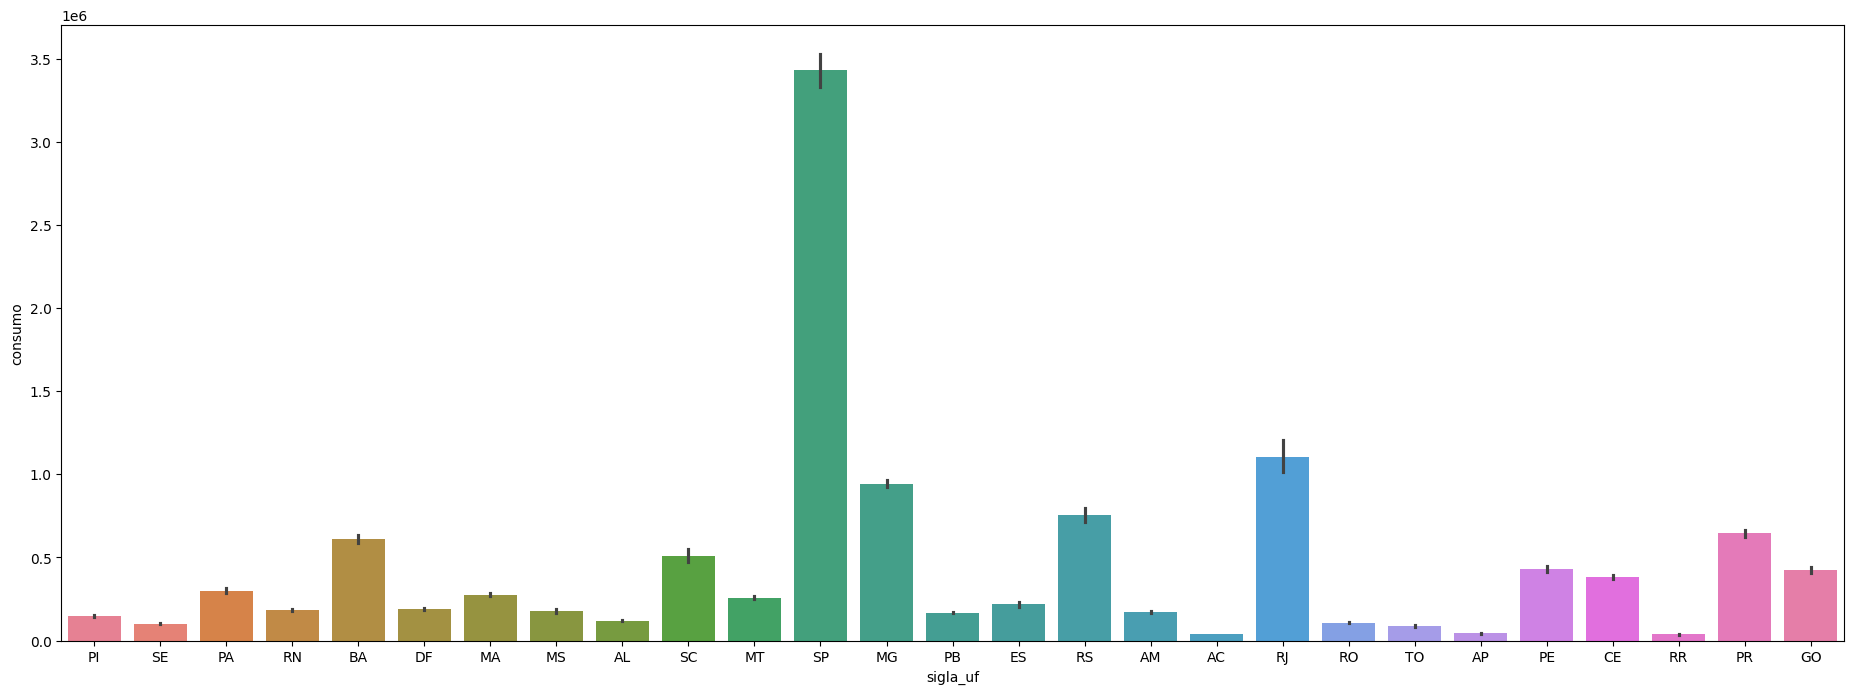

In [55]:
plt.figure(figsize=(23,8))
sns.barplot(
            data=data,
            x='sigla_uf',
            y='consumo',
            hue='sigla_uf'
            )